# Exploratory Data Analysis (EDA) on CS1QA Dataset

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load JSON data
with open('CS1QA_dataset.json') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,code,question,questionType,answer
0,from cs1robots import * load_world('worlds/har...,Please briefly explain the algorithm how you w...,code_explain,To pick up the ball\nWrite the process of pick...
1,from cs1robots import* create_world() hubo=Rob...,"Yes, in zigzag, Hubo is looking to the right a...",task,Yes it's okay!
2,from math import * from cs1media import * #new...,"Then, should I create a function for both vert...",task,"Whether it is a function or an if statement, y..."
3,"f=open(""average-latitude-longitude-countries.c...","I fixed the first error, but I'm not sure wher...",error,If the list1 and 2 printed earlier are correct...
4,from cs1graphics import * from time import sle...,Is it possible to include other layers in a la...,usage,You can have as many sub layers as you need


In [3]:
# Basic structure
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

Dataset Shape: (5543, 4)

Column Types:
 code            object
question        object
questionType    object
answer          object
dtype: object


In [4]:
# Check for missing values
df.isnull().sum()

code            0
question        0
questionType    0
answer          0
dtype: int64

In [5]:
# Unique values per column
df.nunique()

code            2631
question        2575
questionType       9
answer          2706
dtype: int64

In [6]:
# Value counts for the 'answer' column
df['answer'].value_counts()

answer
Yeah                                                                                                                                                                                                                                                         44
Yep                                                                                                                                                                                                                                                          18
Yes, it is                                                                                                                                                                                                                                                   14
Yes, that's right                                                                                                                                                                                                                

In [7]:
# Length of code snippets
df['code_length'] = df['code'].apply(len)
df['code_length'].describe()

count     5543.000000
mean      1672.243731
std       1568.049153
min         18.000000
25%        517.000000
50%        943.000000
75%       2636.000000
max      15333.000000
Name: code_length, dtype: float64

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


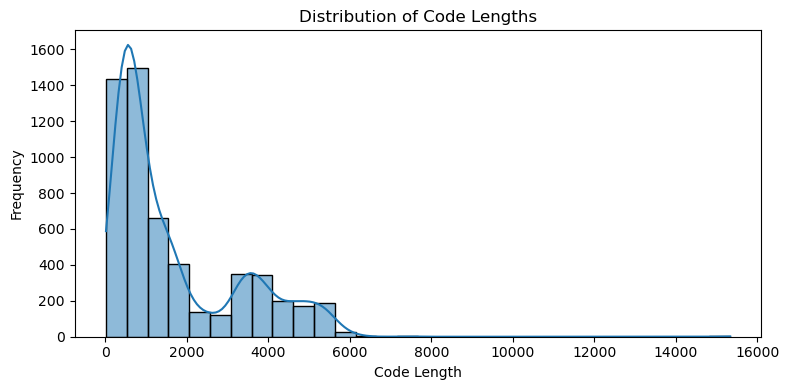

In [8]:
# Plot distribution of code length
plt.figure(figsize=(8, 4))
sns.histplot(df['code_length'], bins=30, kde=True)
plt.title('Distribution of Code Lengths')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
# Function to classify question types
def classify_question_type(q):
    if q.startswith("code_understanding"):
        return "Code Understanding"
    elif q.startswith("logical"):
        return "Logical Error"
    elif q.startswith("error"):
        return "Error"
    elif q.startswith("usage"):
        return "Function/Syntax Usage"
    elif q.startswith("algorithm"):
        return "Algorithm"
    elif q.startswith("task"):
        return "Task"
    elif q.startswith("reasoning"):
        return "Reasoning"
    elif q.startswith("code_explain"):
        return "Explanation"
    elif q.startswith("variable"):
        return "Meaning"
    else:
        return "Other"

# Apply classification
df['question_type'] = df['questionType'].apply(classify_question_type)

# Compute percentages
question_type_counts = df['question_type'].value_counts(normalize=True) * 100
question_type_counts = question_type_counts.rename("Percentage").reset_index().rename(columns={"index": "Question Type"})

# Display table
#import ace_tools as tools; tools.display_dataframe_to_user(name="Question Type Distribution", dataframe=question_type_counts)

# Also return the DataFrame for further inspection
question_type_counts

,question_type,Percentage
0,Meaning,21.017500
1,Task,14.324373
2,Algorithm,12.935234
3,Logical Error,11.491972
4,Error,10.373444
5,Explanation,10.174995
6,Function/Syntax Usage,8.767815
7,Reasoning,8.641530
8,Code Understanding,2.273137


In [10]:
print(question_type_counts)

           question_type  Percentage
0                Meaning   21.017500
1                   Task   14.324373
2              Algorithm   12.935234
3          Logical Error   11.491972
4                  Error   10.373444
5            Explanation   10.174995
6  Function/Syntax Usage    8.767815
7              Reasoning    8.641530
8     Code Understanding    2.273137


In [11]:
# Check column names to make sure they are what we expect
print(question_type_counts.columns)

Index(['question_type', 'Percentage'], dtype='object')


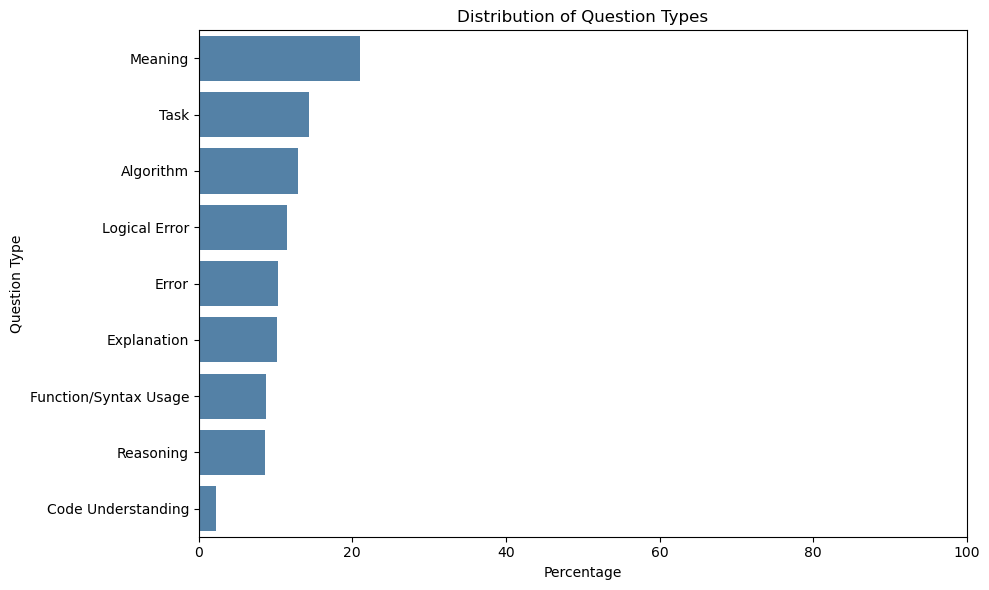

In [14]:
 # Rename columns if necessary (optional, only if names are wrong)
# question_type_counts.columns = ["Question Type", "Percentage"]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=question_type_counts, x="Percentage", y="question_type", color='steelblue')
plt.title("Distribution of Question Types")
plt.xlabel("Percentage")
plt.ylabel("Question Type")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()